<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
def missing_vars(data, column, random_proba=True):
    '''Function is called for filling of missing data'''
    # With using probability and random choise

    if random_proba:
        col_name = data[column].value_counts().index.to_list(
        )  # get list of values
        col_distr = data[column].value_counts(
            normalize=True).values  # get list of probs
        missing = data[column].isnull()  # flag of missing val
        # substitute values from the list of names in accordance with the probability of meeting the name
        data.loc[missing, [column]] = np.random.choice(col_name,
                                                    size=len(data[missing]),
                                                    p=col_distr)

    # Using  most common in  column
    data[column] = data[column].fillna(data[column].value_counts().index[0])

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train['sample'] = 1 #помечаем тренировочную выборку как 1
test['sample'] = 0 #помечаем тестовую выборку как 0
data = pd.concat([train, test])

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.isna().sum()

ClientPeriod                   0
MonthlySpending                0
TotalSpent                     0
Sex                            0
IsSeniorCitizen                0
HasPartner                     0
HasChild                       0
HasPhoneService                0
HasMultiplePhoneNumbers        0
HasInternetService             0
HasOnlineSecurityService       0
HasOnlineBackup                0
HasDeviceProtection            0
HasTechSupportAccess           0
HasOnlineTV                    0
HasMovieSubscription           0
HasContractPhone               0
IsBillingPaperless             0
PaymentMethod                  0
Churn                       1761
sample                         0
dtype: int64

Пропусков в базе нет


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 1760
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              7043 non-null   int64  
 1   MonthlySpending           7043 non-null   float64
 2   TotalSpent                7043 non-null   object 
 3   Sex                       7043 non-null   object 
 4   IsSeniorCitizen           7043 non-null   int64  
 5   HasPartner                7043 non-null   object 
 6   HasChild                  7043 non-null   object 
 7   HasPhoneService           7043 non-null   object 
 8   HasMultiplePhoneNumbers   7043 non-null   object 
 9   HasInternetService        7043 non-null   object 
 10  HasOnlineSecurityService  7043 non-null   object 
 11  HasOnlineBackup           7043 non-null   object 
 12  HasDeviceProtection       7043 non-null   object 
 13  HasTechSupportAccess      7043 non-null   object 
 14  HasOnlin

Видим, что признак "TotalSpent" в строковом формате, приведем его к типу float

In [8]:
# data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

# Unable to parse string " " at position 1048

In [9]:
train[train['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn,sample
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0,1
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0,1
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0,1
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0,1
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0,1
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0,1
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0,1
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0,1
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0,1


In [10]:
test[test['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,sample
177,0,19.85,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


Видим наличие пропусков в обеих выборках, которые не увидел isna(). Удалим их.

In [11]:
inx_to_drop = data[data.TotalSpent==' '].index
data['TotalSpent'] = data['TotalSpent'].apply(lambda x:None if x == ' ' else x)
missing_vars(data,'TotalSpent')
# data = data.drop(inx_to_drop, axis=0).reset_index()

In [12]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

# ЧИСЛОВЫЕ

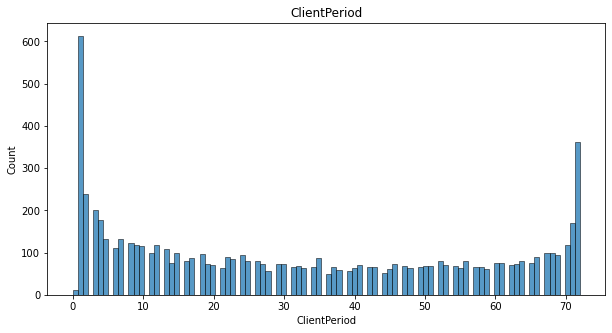

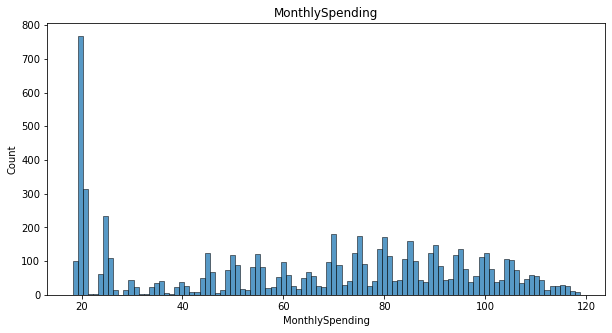

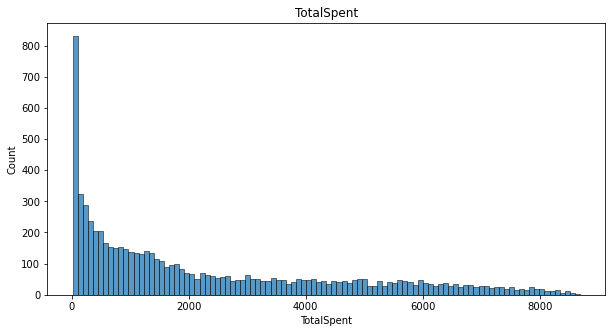

In [13]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data[col], palette='mako', bins=100)
    plt.title(col)
    plt.show()

## КАТЕГОРИАЛЬНЫЕ

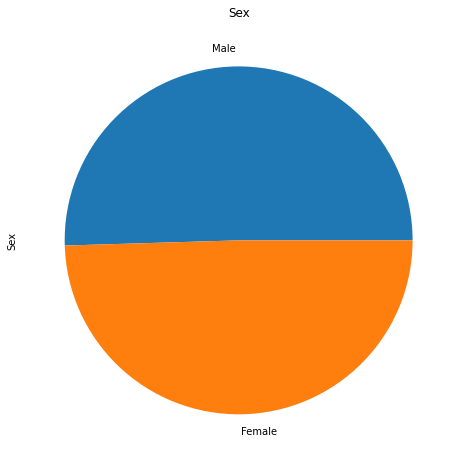

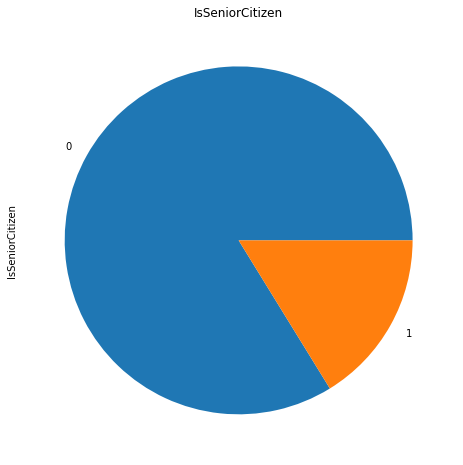

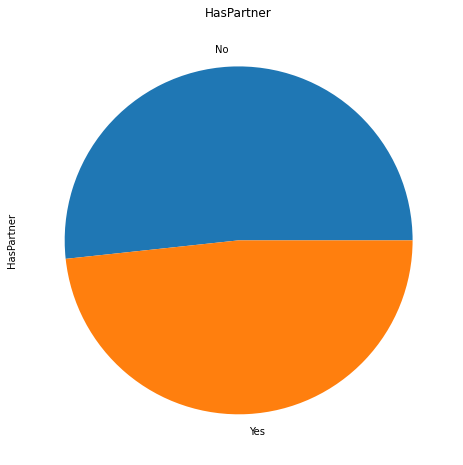

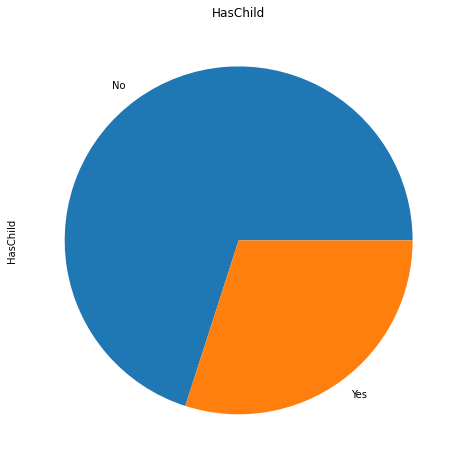

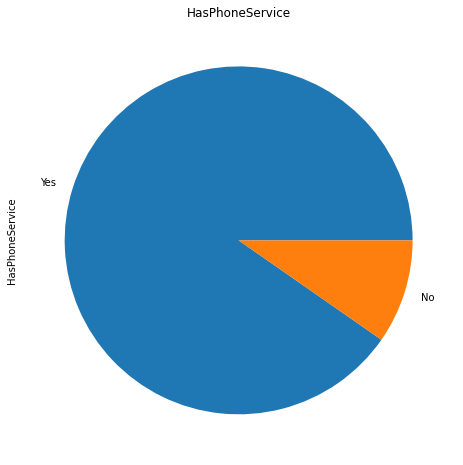

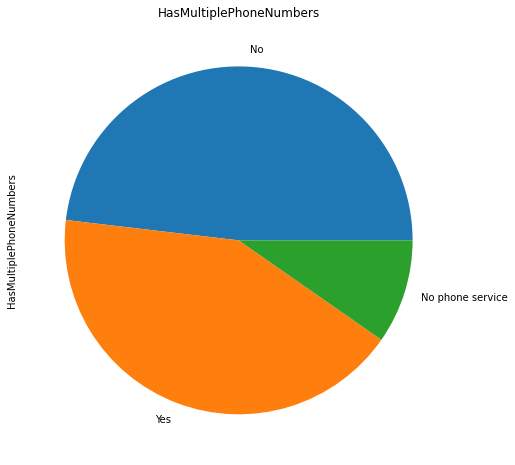

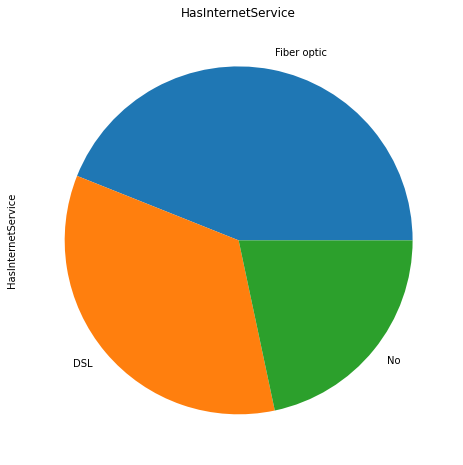

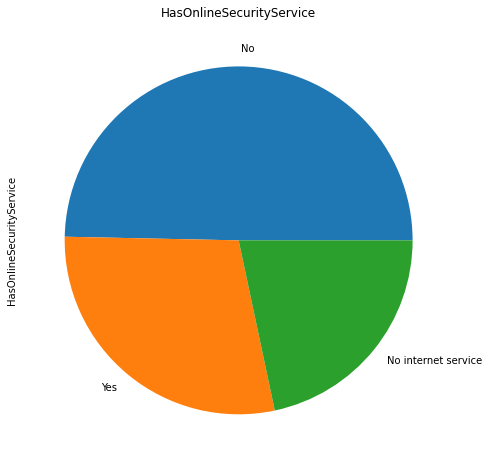

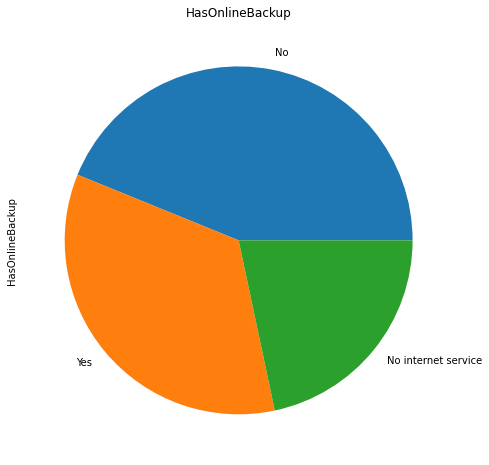

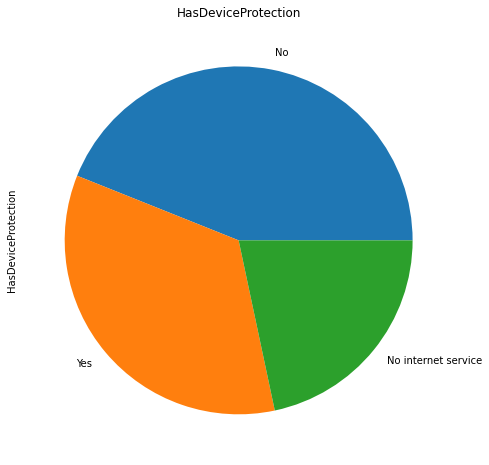

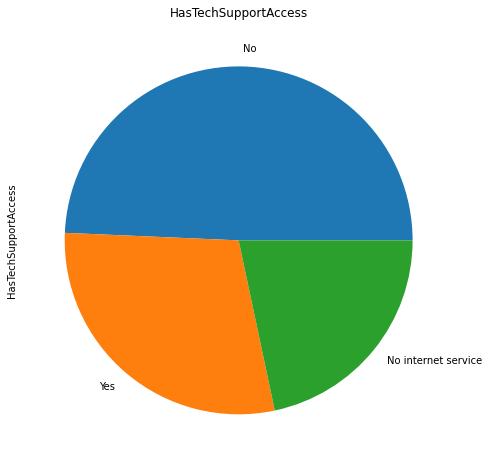

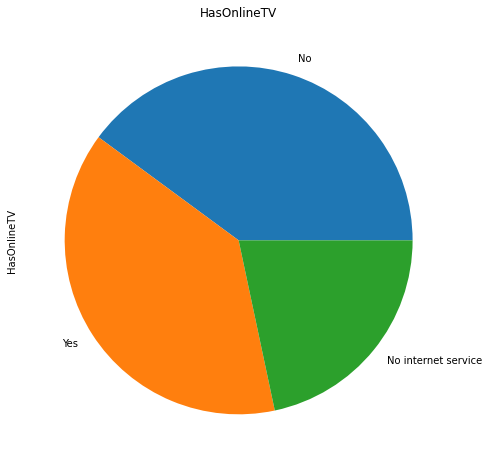

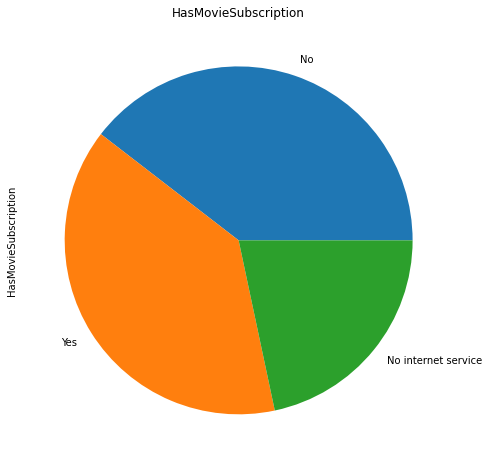

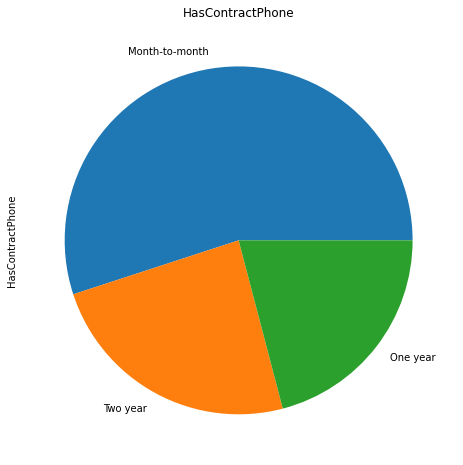

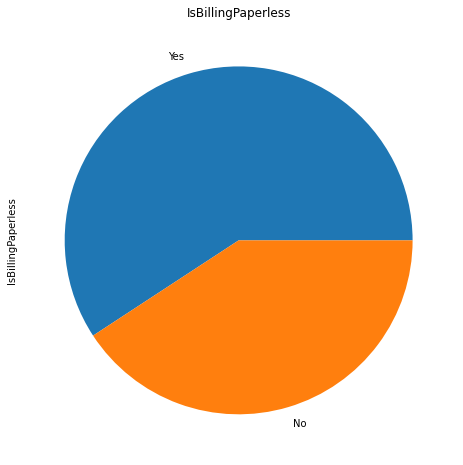

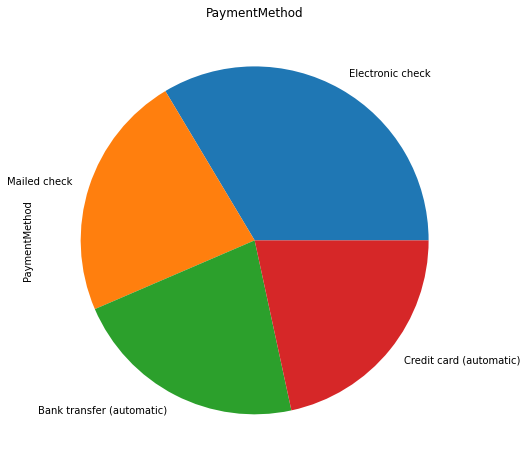

In [14]:
for col in cat_cols:
    plt.figure(figsize=(8, 8))
    data[col].value_counts().plot(kind='pie')
    plt.title(col)
    plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

# ЦЕЛЕВАЯ

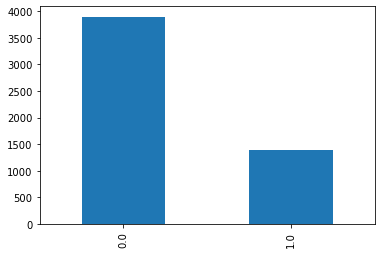

In [15]:
data['Churn'].value_counts().plot(kind='bar');

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

In [17]:
RANDOM_SEED = 42

In [18]:
scaler =StandardScaler()
label_enc = LabelEncoder()
hot_enc = OneHotEncoder()


In [19]:
train = data[data['sample'] == 1].drop(['sample'], axis=1)
test = data[data['sample'] == 0].drop(['sample'], axis=1)

# нормализуем числовые признаки
train_scaled = pd.DataFrame(scaler.fit_transform(train[num_cols]), columns=num_cols)
test_scaled = pd.DataFrame(scaler.transform(test[num_cols]), columns=num_cols)

In [20]:
# Делаем label encoding
train_labeled = pd.DataFrame()
test_labeled = pd.DataFrame()
for col in cat_cols:
    train_labeled[col] = label_enc.fit_transform(train[col])
    test_labeled[col] = label_enc.fit_transform(test[col])

In [21]:
#генерируем список из признаков, где количество значений больше чем 2, т.к. нет смысла хотэнкодить бинарные признаки
cols_to_hot = [x for x in cat_cols  if data[x].nunique() > 2] 

hotted_train = pd.get_dummies(train_labeled, columns=cols_to_hot)
hotted_test = pd.get_dummies(test_labeled, columns=cols_to_hot)

In [22]:
# объединяем обработанные признаки
preprocessed_train = pd.concat([train_scaled, hotted_train], axis=1)
preprocessed_train['Churn'] = data[data['sample'] == 1]['Churn']

preprocessed_test = pd.concat([test_scaled, hotted_test], axis=1)

In [23]:
X = preprocessed_train.drop(['Churn'], axis =1)
y = preprocessed_train['Churn']

In [24]:
log_model = LogisticRegression(class_weight='balanced')
param = {
    'penalty':['l1', 'l2', 'elasticnet'],
    'C':[100, 10, 1, 0.1, 0.01, 0.001]
}
grid = GridSearchCV(log_model, param_grid=param,verbose=1, scoring='roc_auc',refit=True)

In [25]:
grid.fit(X.values, y.values)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\vetak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this 

C:\Users\vetak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.7s 

GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [27]:
predict = grid.predict(preprocessed_test)


In [28]:
submission = pd.DataFrame({'Id': range(0, 1761),
                           'Churn': predict})
submission.to_csv('submission.csv', index=False)

submission

,Id,Churn
0,0,0.0
1,1,1.0
2,2,1.0
3,3,0.0
4,4,0.0
...,...,...
1756,1756,0.0
1757,1757,0.0
1758,1758,1.0
1759,1759,1.0


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [26]:
grid.best_score_

0.8446008410189494

In [37]:
grid.best_params_

{'C': 100, 'penalty': 'l2'}

# ROC-AUC 0.8446008410189494
# PARAMS {'C': 100, 'penalty': 'l2'}

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [29]:
from catboost import CatBoostClassifier

In [30]:

# cbr = CatBoostClassifier(cat_features=cat_cols,)

# # Гридсёрч для катбуста
# param_grid = {'iterations': [200],
#               'learning_rate': [0.25],
#               'l2_leaf_reg': [1],
#               'depth': np.arange(4,6),
#               'thread_count': [4]}

# cbr.grid_search(param_grid=param_grid,
#                 X=train.drop(['Churn'], axis=1),
#                 y=train['Churn'],
#                 cv=5,
#                 partition_random_seed=42,
#                 calc_cv_statistics=True,
#                 search_by_train_test_split=True,
#                 refit=True,
#                 shuffle=True,
#                 stratified=None,
#                 train_size=0.8,
#                 verbose=False,
#                 plot=True,)

# Лучшие пераметры:

# {'thread_count': 4,
#  'depth': 5,
#  'l2_leaf_reg': 1,
#  'iterations': 200,
#  'learning_rate': 0.25
# }

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [31]:
cat_ = CatBoostClassifier(cat_features=cat_cols)
param = {'iterations': [200],
         'learning_rate': [0.25],
         'l2_leaf_reg': [1],
         'depth': np.arange(5, 7),
         'thread_count': [4]}
cat_grid = GridSearchCV(cat_, param_grid=param, verbose=1,
                        scoring='roc_auc', refit=True, n_jobs=-1,cv=5)

In [32]:
cat_grid.fit(train.drop(['Churn'], axis=1), train['Churn'])

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   20.4s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.7s finished


0:	learn: 0.5597305	total: 186ms	remaining: 36.9s
1:	learn: 0.4947585	total: 258ms	remaining: 25.5s
2:	learn: 0.4604423	total: 304ms	remaining: 19.9s
3:	learn: 0.4416897	total: 350ms	remaining: 17.2s
4:	learn: 0.4324756	total: 392ms	remaining: 15.3s
5:	learn: 0.4214057	total: 434ms	remaining: 14s
6:	learn: 0.4142827	total: 503ms	remaining: 13.9s
7:	learn: 0.4099001	total: 544ms	remaining: 13.1s
8:	learn: 0.4065522	total: 587ms	remaining: 12.5s
9:	learn: 0.4044428	total: 627ms	remaining: 11.9s
10:	learn: 0.4022172	total: 666ms	remaining: 11.4s
11:	learn: 0.4008081	total: 724ms	remaining: 11.3s
12:	learn: 0.3996449	total: 767ms	remaining: 11s
13:	learn: 0.3989754	total: 807ms	remaining: 10.7s
14:	learn: 0.3974435	total: 845ms	remaining: 10.4s
15:	learn: 0.3958710	total: 894ms	remaining: 10.3s
16:	learn: 0.3953185	total: 975ms	remaining: 10.5s
17:	learn: 0.3952749	total: 992ms	remaining: 10s
18:	learn: 0.3942112	total: 1.03s	remaining: 9.84s
19:	learn: 0.3939680	total: 1.07s	remaining: 9.

161:	learn: 0.3004592	total: 7.6s	remaining: 1.78s
162:	learn: 0.3001445	total: 7.64s	remaining: 1.73s
163:	learn: 0.2997720	total: 7.68s	remaining: 1.69s
164:	learn: 0.2989705	total: 7.72s	remaining: 1.64s
165:	learn: 0.2981724	total: 7.8s	remaining: 1.6s
166:	learn: 0.2977594	total: 7.85s	remaining: 1.55s
167:	learn: 0.2973469	total: 7.89s	remaining: 1.5s
168:	learn: 0.2970575	total: 7.93s	remaining: 1.46s
169:	learn: 0.2967455	total: 7.98s	remaining: 1.41s
170:	learn: 0.2963705	total: 8.03s	remaining: 1.36s
171:	learn: 0.2962178	total: 8.07s	remaining: 1.31s
172:	learn: 0.2954306	total: 8.12s	remaining: 1.27s
173:	learn: 0.2949228	total: 8.16s	remaining: 1.22s
174:	learn: 0.2945263	total: 8.2s	remaining: 1.17s
175:	learn: 0.2943836	total: 8.24s	remaining: 1.12s
176:	learn: 0.2933716	total: 8.28s	remaining: 1.08s
177:	learn: 0.2929689	total: 8.33s	remaining: 1.03s
178:	learn: 0.2926036	total: 8.37s	remaining: 982ms
179:	learn: 0.2921020	total: 8.41s	remaining: 934ms
180:	learn: 0.291

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001AB414B6160>,
             n_jobs=-1,
             param_grid={'depth': array([5, 6]), 'iterations': [200],
                         'l2_leaf_reg': [1], 'learning_rate': [0.25],
                         'thread_count': [4]},
             scoring='roc_auc', verbose=1)

In [33]:
cat_grid.best_params_

{'depth': 5,
 'iterations': 200,
 'l2_leaf_reg': 1,
 'learning_rate': 0.25,
 'thread_count': 4}

In [34]:
cat_grid.best_score_

0.8291138142715988

# ROC-AUC 
## 0.8291138142715988
# PARAMS 
## {'depth': 5, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.25, 'thread_count': 4}

In [35]:
best_model = grid
best_model.fit(X, y)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\vetak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this 

C:\Users\vetak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vetak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vetak\anaconda3\lib\site-packages\sklearn\model_sele

GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [39]:
predict = best_model.predict(preprocessed_test)


In [40]:
submission = pd.DataFrame({'Id': range(0, 1761),
                           'Churn': predict})
submission.to_csv('my_submission.csv', index=False)

submission

,Id,Churn
0,0,0.0
1,1,1.0
2,2,1.0
3,3,0.0
4,4,0.0
...,...,...
1756,1756,0.0
1757,1757,0.0
1758,1758,1.0
1759,1759,1.0


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.